# Severe Weather Capstone - Pre-processing

Greg Welliver   

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as plticker
import seaborn as sns
sns.set()
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
import warnings
from scipy import stats
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
%matplotlib inline


import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from scipy import stats

from sklearn import linear_model, preprocessing, tree, svm, datasets, metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, mean_squared_error, r2_score, f1_score, log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import xgboost
from xgboost import XGBClassifier
import warnings
from subprocess import call
from IPython.display import Image
from datetime import datetime, timedelta, date
import os
import plotly.graph_objects as go
import itertools
from io import StringIO  
import pydotplus

# Seaborn settings
sns.set_context('notebook')
#sns.set_style("whitegrid")
#sns.set_style("white")
style_set = sns.set_style('whitegrid')
pd.options.display.float_format = '{:,}'.format
color_choice1 = 'plum'
color_choice2 = 'lightblue'
color_choice3 = 'lightgreen'
#ax.yaxis.set_major_formatter('{x:,.0f}')
#sns.set_context('notebook', font_scale = 4)


%matplotlib inline
import pandas as pd
#from mpl_toolkits.basemap import Basemap


import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx

from sklearn.feature_extraction.text import CountVectorizer


## Load the data



In [2]:
# load data
df = pd.read_parquet("../Data/all_storm_data11.pqt")
#df = pd.read_csv("../Data/all_storm_data4.csv")

In [3]:
df.head(40).T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
BEGIN_YEARMONTH,202202,202202,202202,202202,202202,202202,202202,202202,202202,202202,...,202201,202208,202208,202208,202208,202208,202208,202208,202208,202208
BEGIN_TIME,2118,800,200,1609,0,500,100,100,200,400,...,1200,1811,1839,1839,1225,1220,1218,1224,1224,1230
STATE,NEVADA,NEVADA,NEVADA,ATLANTIC SOUTH,AMERICAN SAMOA,AMERICAN SAMOA,KANSAS,KANSAS,MASSACHUSETTS,MASSACHUSETTS,...,OHIO,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS
YEAR,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,...,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022
MONTH_NAME,February,February,February,February,February,February,February,February,February,February,...,January,August,August,August,August,August,August,August,August,August
EVENT_TYPE,High Wind,Heavy Snow,Heavy Snow,Waterspout,Heavy Rain,Heavy Rain,Winter Storm,Winter Storm,Heavy Snow,Heavy Snow,...,Winter Weather,Hail,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind
BEGIN_DATE_TIME,2022-02-20 21:18:00,2022-02-21 08:00:00,2022-02-22 02:00:00,2022-02-18 16:09:00,2022-02-02 00:00:00,2022-02-12 05:00:00,2022-02-01 01:00:00,2022-02-01 01:00:00,2022-02-13 02:00:00,2022-02-13 04:00:00,...,2022-01-16 12:00:00,2022-08-29 18:11:00,2022-08-29 18:39:00,2022-08-29 18:39:00,2022-08-29 12:25:00,2022-08-29 12:20:00,2022-08-29 12:18:00,2022-08-29 12:24:00,2022-08-29 12:24:00,2022-08-29 12:30:00
INJURIES_DIRECT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
INJURIES_INDIRECT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DEATHS_DIRECT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# remove columns that won't have any predictive value
df = df.drop(['ST_CT_FIPS', 'EVENT_NARRATIVE', 'EPISODE_NARRATIVE', 'BEGIN_LON', 'BEGIN_LAT', 'BEGIN_DATE_TIME', 'MONTH_NAME', 'YEAR', 'BEGIN_YEARMONTH', 'MAGNITUDE_TYPE', 'TOR_F_SCALE'], axis=1)

In [5]:
# drop columns that have a lot of missing values
df = df.drop(['FLOOD_CAUSE', 'INJURIES_DIRECT', 'INJURIES_INDIRECT'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555647 entries, 0 to 1555646
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   BEGIN_TIME       1555647 non-null  int64  
 1   STATE            1555647 non-null  object 
 2   EVENT_TYPE       1555647 non-null  object 
 3   DEATHS_DIRECT    1555647 non-null  int64  
 4   DEATHS_INDIRECT  1555647 non-null  int64  
 5   DAMAGE_PROPERTY  1555647 non-null  float64
 6   MAGNITUDE        1555647 non-null  float64
 7   TOR_LENGTH       1555647 non-null  float64
 8   TOR_WIDTH        1555647 non-null  float64
 9   DURATION         1555647 non-null  float64
 10  STORM_AREA       916584 non-null   float64
 11  PopDensity       1035753 non-null  float64
 12  Population       1031063 non-null  float64
 13  HPI              1051529 non-null  float64
dtypes: float64(9), int64(3), object(2)
memory usage: 178.0+ MB


In [7]:
# fill storm area nulls with zero
#df['STORM_AREA'] = df['STORM_AREA'].fillna(0)

In [8]:
df.head(30)

,BEGIN_TIME,STATE,EVENT_TYPE,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,DURATION,STORM_AREA,PopDensity,Population,HPI
0,2118,NEVADA,High Wind,0,0,0.0,36.0,0.0,0.0,60.0,NaN,0.4236221825,"9,078.0","34,169.0"
1,800,NEVADA,Heavy Snow,0,0,0.0,0.0,0.0,0.0,"1,560.0",NaN,NaN,NaN,NaN
2,200,NEVADA,Heavy Snow,0,0,0.0,0.0,0.0,0.0,420.0,NaN,27.60229777,"486,489.0","118,374.0"
3,1609,ATLANTIC SOUTH,Waterspout,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,0,AMERICAN SAMOA,Heavy Rain,0,0,"50,000.0",0.0,0.0,0.0,"1,440.0",0.006299999999999528,NaN,NaN,NaN
5,500,AMERICAN SAMOA,Heavy Rain,0,0,0.0,0.0,0.0,0.0,"1,020.0",0.005300000000000082,NaN,NaN,NaN
6,100,KANSAS,Winter Storm,0,0,0.0,0.0,0.0,0.0,600.0,NaN,NaN,NaN,NaN
7,100,KANSAS,Winter Storm,0,0,0.0,0.0,0.0,0.0,660.0,NaN,NaN,NaN,NaN
8,200,MASSACHUSETTS,Heavy Snow,0,0,0.0,0.0,0.0,0.0,"1,680.0",NaN,NaN,NaN,NaN
9,400,MASSACHUSETTS,Heavy Snow,0,0,0.0,0.0,0.0,0.0,"1,680.0",NaN,293.5650603,"465,834.0","104,146.0"


In [9]:
df.shape

(1555647, 14)

In [10]:
df.isna().sum().sum()


2187659

In [11]:
# drop rows with null values
df = df.dropna(axis=0).reset_index()
df = df.drop(['index'], axis=1)
# y_train = y_train.dropna(axis=0)
# y_test = y_test.dropna(axis=0)

In [12]:
df.shape

(751632, 14)

In [13]:
# when including storm size fill to zero
1011673

1011673

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751632 entries, 0 to 751631
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BEGIN_TIME       751632 non-null  int64  
 1   STATE            751632 non-null  object 
 2   EVENT_TYPE       751632 non-null  object 
 3   DEATHS_DIRECT    751632 non-null  int64  
 4   DEATHS_INDIRECT  751632 non-null  int64  
 5   DAMAGE_PROPERTY  751632 non-null  float64
 6   MAGNITUDE        751632 non-null  float64
 7   TOR_LENGTH       751632 non-null  float64
 8   TOR_WIDTH        751632 non-null  float64
 9   DURATION         751632 non-null  float64
 10  STORM_AREA       751632 non-null  float64
 11  PopDensity       751632 non-null  float64
 12  Population       751632 non-null  float64
 13  HPI              751632 non-null  float64
dtypes: float64(9), int64(3), object(2)
memory usage: 80.3+ MB


## Create dummy variables for categorical data types

In [15]:
# isolate categorical variables
categorical_features = df.select_dtypes(include=['object'])

In [16]:
df = pd.concat([df.drop(categorical_features, axis=1), pd.get_dummies(categorical_features)], axis=1)

### Split data into training and testing subsets

In [17]:
# Create the X and y matrices from the dataframe
X = df.drop(columns = ['DAMAGE_PROPERTY'])
y = df['DAMAGE_PROPERTY']

In [18]:
# from sklearn.model_selection import train_test_split; reserve 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1234)

In [19]:
#X_train.isna().sum().sum()

## Scaling and Transforming Numeric Features

In [20]:
# Create subset of only the numeric columns
numeric_df = df.select_dtypes(include=['int', 'float'])
numeric_df = numeric_df.drop(columns = ['DAMAGE_PROPERTY'])

In [21]:
numeric_column_names = list(numeric_df.columns)

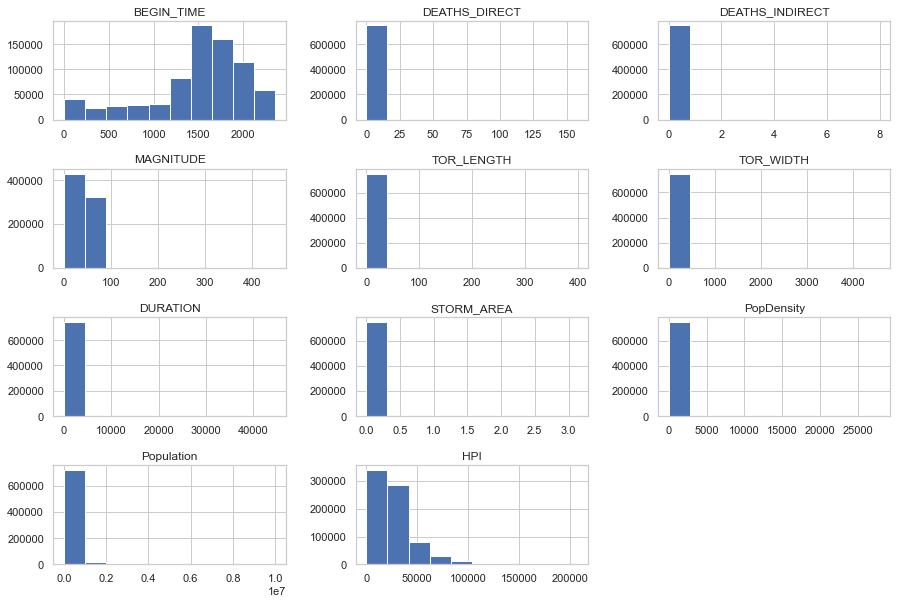

In [22]:
# let's look at the distribution of numeric variables
numeric_df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In [23]:
# isolate numeric features of X_train and X_test
numeric_df_X_train = X_train.select_dtypes(include=['int', 'float'])
numeric_df_X_test = X_test.select_dtypes(include=['int', 'float'])

In [24]:
#numeric_df_X_test.isna().sum().sum()

### Let's try standardize features with StandardScaler

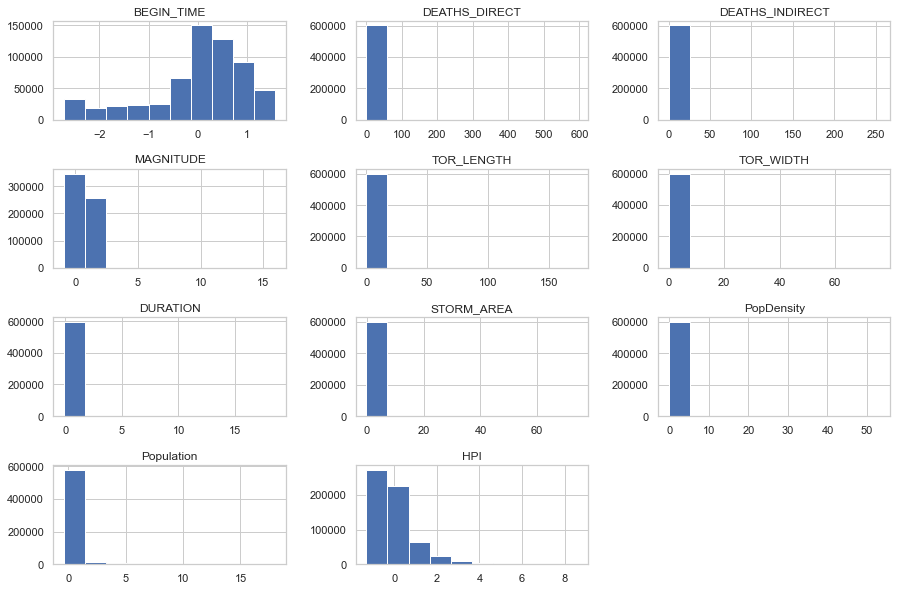

In [25]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# create model, fit, and transform
SS_scaler = StandardScaler()
numeric_df_ss_X_train = SS_scaler.fit_transform(numeric_df_X_train)
numeric_df_ss_X_test = SS_scaler.fit_transform(numeric_df_X_test)

# convert back to dataframe for plotting
numeric_df_ss_X_train = pd.DataFrame(numeric_df_ss_X_train)
numeric_df_ss_X_train.columns = numeric_column_names
numeric_df_ss_X_test = pd.DataFrame(numeric_df_ss_X_test)
numeric_df_ss_X_test.columns = numeric_column_names

numeric_df_ss_X_train.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

#### Update numeric column values with the Standardized values

In [26]:
# reset index
X_train = X_train.reset_index()
# drop extra column
X_train = X_train.drop(['index'], axis=1)

In [27]:
X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

In [28]:
for column_name in numeric_column_names:
    X_train[column_name] = numeric_df_ss_X_train[column_name]

In [29]:
for column_name in numeric_column_names:
    X_test[column_name] = numeric_df_ss_X_test[column_name]

In [30]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [31]:
len(X)

751632

In [32]:
len(y)

751632

In [33]:
# convert y_test and y_train to dataframes so they can be written to file
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

#### write to parquest - 4 files

In [34]:
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/X_train.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_train.to_parquet(filepath)

In [35]:
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/X_test.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_test.to_parquet(filepath)

In [36]:
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/y_train.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
y_train.to_parquet(filepath)

In [37]:
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/y_test.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
y_test.to_parquet(filepath)